In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups

In [2]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test  = fetch_20newsgroups(subset='test')

In [3]:
newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
newsgroups_train.target.size, newsgroups_test.target.size

(11314, 7532)

In [5]:
print(newsgroups_train.data[3])

From: jgreen@amber (Joe Green)
Subject: Re: Weitek P9000 ?
Organization: Harris Computer Systems Division
Lines: 14
Distribution: world
NNTP-Posting-Host: amber.ssd.csd.harris.com
X-Newsreader: TIN [version 1.1 PL9]

Robert J.C. Kyanko (rob@rjck.UUCP) wrote:
> abraxis@iastate.edu writes in article <abraxis.734340159@class1.iastate.edu>:
> > Anyone know about the Weitek P9000 graphics chip?
> As far as the low-level stuff goes, it looks pretty nice.  It's got this
> quadrilateral fill command that requires just the four points.

Do you have Weitek's address/phone number?  I'd like to get some information
about this chip.

--
Joe Green				Harris Corporation
jgreen@csd.harris.com			Computer Systems Division
"The only thing that really scares me is a person with no sense of humor."
						-- Jonathan Winters



In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [7]:
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test  = vectorizer.transform(newsgroups_test.data)

In [8]:
y_train = newsgroups_train.target
y_test  = newsgroups_test.target

In [9]:
X_train.shape, y_train.shape

((11314, 130107), (11314,))

In [10]:
X_test.shape, y_test.shape

((7532, 130107), (7532,))

In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [12]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
clf.score(X_test, y_test)

0.8274030801911842

In [14]:
X_train[0]

<1x130107 sparse matrix of type '<class 'numpy.float64'>'
	with 89 stored elements in Compressed Sparse Row format>

In [15]:
X_train_0 = X_train[0].toarray()
X_train_0

array([[0., 0., 0., ..., 0., 0., 0.]])

In [16]:
np.count_nonzero(X_train_0), X_train_0.shape[1]

(89, 130107)

In [17]:
X_train_0[np.nonzero(X_train_0)]

array([0.06332604, 0.14155753, 0.13874908, 0.0953487 , 0.03709893,
       0.10278592, 0.02991186, 0.0871642 , 0.16713176, 0.09353931,
       0.13280753, 0.03770449, 0.0690878 , 0.0343176 , 0.38133891,
       0.07801368, 0.04951999, 0.06621689, 0.10015015, 0.11603643,
       0.0845253 , 0.05461429, 0.09714744, 0.13412921, 0.05747015,
       0.08646963, 0.1558717 , 0.02921528, 0.08342748, 0.03542092,
       0.06363421, 0.09785516, 0.02245166, 0.07313444, 0.07325812,
       0.05097865, 0.04280825, 0.09219024, 0.35383501, 0.01921946,
       0.09036441, 0.0690878 , 0.06339409, 0.05989857, 0.10936401,
       0.03955173, 0.08844382, 0.03696979, 0.07000411, 0.13157119,
       0.03567186, 0.06521174, 0.05715821, 0.03188937, 0.01992886,
       0.0454964 , 0.04114286, 0.09913274, 0.05545703, 0.03447138,
       0.10826904, 0.16068606, 0.05666562, 0.08171219, 0.0846283 ,
       0.09869735, 0.07526016, 0.10844725, 0.10809248, 0.01915672,
       0.17691751, 0.05511105, 0.12287763, 0.03671831, 0.06214

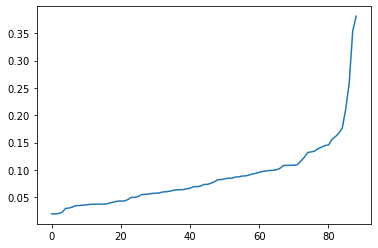

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(np.sort(X_train_0[np.nonzero(X_train_0)]))

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Binarizer

pipe = Pipeline([('bin', Binarizer()), 
                 ('clf', LogisticRegression())])

In [ ]:
from sklearn.model_selection import GridSearchCV

param = {'bin__threshold': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4]}

gs1 = GridSearchCV(pipe, param, n_jobs=-1, verbose=2)
gs1.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


In [ ]:
gs1.best_params_, gs1.best_score_, gs1.best_estimator_

In [ ]:
gs1.score(X_test, y_test)

In [ ]:
plt.errorbar(gs1.cv_results_['param_bin__threshold'].data, 
             gs1.cv_results_['mean_train_score'], 
             yerr=gs1.cv_results_['std_train_score'],
             label="training")

plt.errorbar(gs1.cv_results_['param_bin__threshold'].data,
             gs1.cv_results_['mean_test_score'], 
             yerr=gs1.cv_results_['std_test_score'],
             label="test(val)")

plt.ylim(0, 1.01)
plt.xlabel("threshold")
plt.ylabel("accuracy")
plt.legend(loc="best");

In [ ]:
pipe = Pipeline([('bin', Binarizer()), 
                 ('clf', LogisticRegression())])

param = {'bin__threshold': [0.001, 0.01, 0.05],
         'clf__C': 10**np.arange(1.0, 10.0) }

from sklearn.model_selection import RandomizedSearchCV

gs11 = RandomizedSearchCV(pipe, param, n_jobs=-1, verbose=2)
gs11.fit(X_train, y_train)

In [ ]:
gs11.best_params_, gs11.best_score_, gs11.best_estimator_

In [ ]:
gs11.score(X_test, y_test)

In [ ]:
from sklearn.svm import LinearSVC

pipe = Pipeline([('bin', Binarizer()), 
                 ('clf', LinearSVC())])

param = {'bin__threshold': [0.001, 0.01, 0.05],
         'clf__C': 10**np.arange(1.0, 10.0) }

from sklearn.model_selection import RandomizedSearchCV

gs2 = RandomizedSearchCV(pipe, param, n_jobs=-1, verbose=2)
gs2.fit(X_train, y_train)

In [ ]:
gs2.best_params_, gs2.best_score_, gs2.best_estimator_

In [ ]:
gs2.score(X_test, y_test)

In [ ]:
from sklearn.linear_model import SGDClassifier

pipe = Pipeline([('bin', Binarizer()), 
                 ('clf', SGDClassifier(loss="hinge") )])

param = {'bin__threshold': [0.001, 0.01, 0.05],
         'clf__alpha': 10**np.arange(-10.0, -1.0) }

from sklearn.model_selection import RandomizedSearchCV

gs22 = RandomizedSearchCV(pipe, param, n_jobs=-1, verbose=2)
gs22.fit(X_train, y_train)

In [ ]:
gs22.best_params_, gs22.best_score_, gs22.best_estimator_

In [ ]:
gs22.score(X_test, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = gs22.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred, digits=4))

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray()

plt.imshow(1- conf_mat / conf_mat.sum(axis=1),
           interpolation='nearest')

plt.yticks(range(20), newsgroups_train.target_names);
plt.xticks(range(20), newsgroups_train.target_names, rotation=90);